In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
.libPaths(c("/content/drive/MyDrive/Colab Notebooks/R_lib", .libPaths()))

In [3]:
.libPaths(c("/content/drive/MyDrive/Colab Notebooks/R_lib", .libPaths()))
library(limma)
library(dplyr)
library(tidyverse)
library(pheatmap)
library(EnhancedVolcano)
library(ggplot2)
library(plotly)
library(EnhancedVolcano)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: ggrepel


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [4]:
filtered_num_mat = read.csv('filtered_num_mat.csv', row.names = 1)
exp_log = log2(filtered_num_mat + 1)

exp_scaled_t = scale(t(exp_log))
exp_scaled = t(exp_scaled_t)

#### Preprocssing analysis

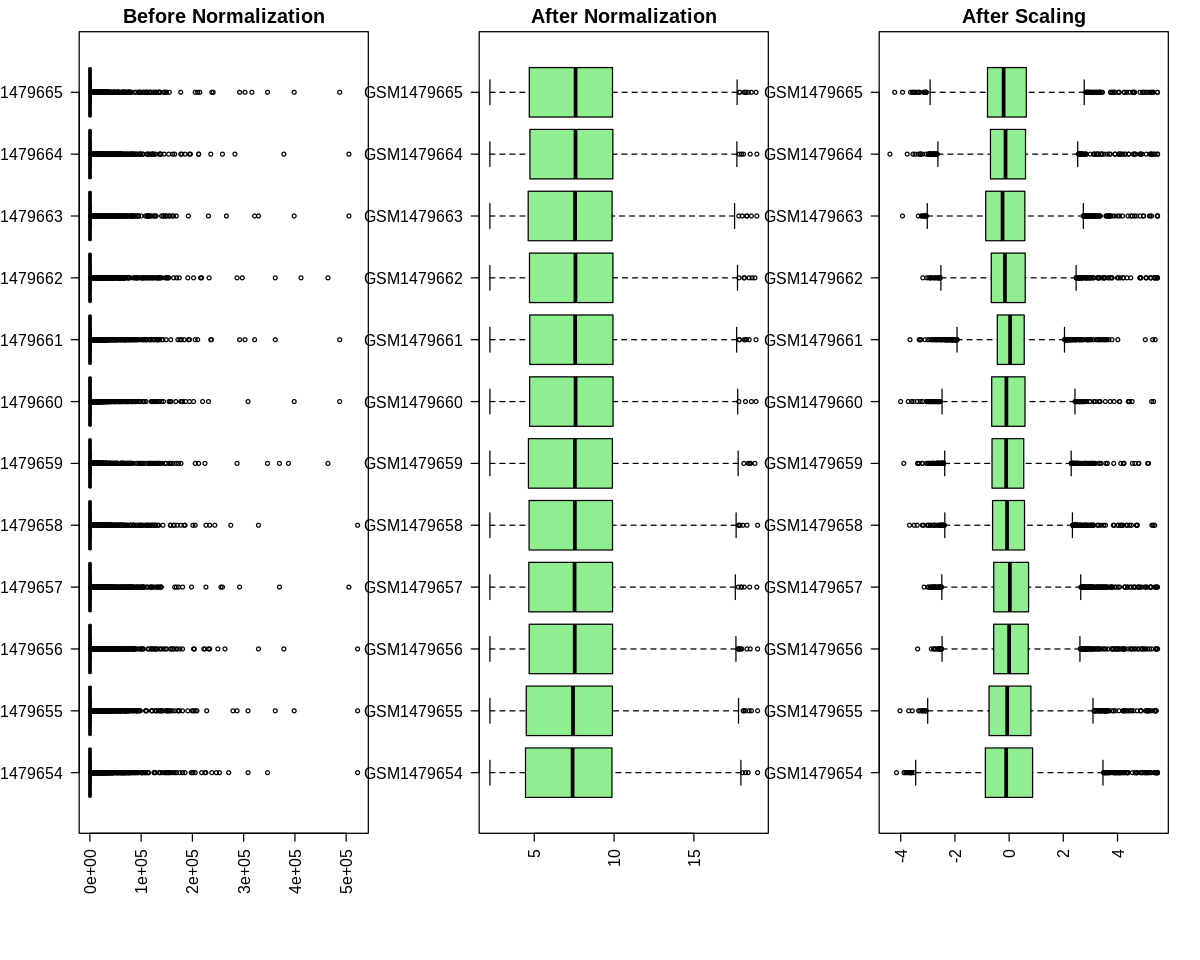

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
par(mar = c(8, 5, 2, 2), mfrow = c(1, 3))  # Adjust margins and set layout

# Boxplot: Before Normalization
boxplot(
  filtered_num_mat[, 1:12],
  main = "Before Normalization",
  horizontal = TRUE,
  names = colnames(filtered_num_mat)[1:12],
  las = 2,
  col = "lightgreen",
  cex.main = 1.5,
  font.main = 2,
  cex.axis = 1.2,
  font.axis = 2
)

# Boxplot: After Normalization
boxplot(
  exp_log[, 1:12],
  main = "After Normalization",
  horizontal = TRUE,
  names = colnames(exp_log)[1:12],
  las = 2,
  col = "lightgreen",
  cex.main = 1.5,
  font.main = 2,
  cex.axis = 1.2,
  font.axis = 2
)

# Boxplot: After Scaling
boxplot(
  exp_scaled[, 1:12],
  main = "After Scaling",
  horizontal = TRUE,
  names = colnames(exp_scaled)[1:12],
  las = 2,
  col = "lightgreen",
  cex.main = 1.5,
  font.main = 2,
  cex.axis = 1.2,
  font.axis = 2
)